In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential
from zipfile import ZipFile
from os import listdir

import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import random

In [ ]:
zip_ref = ZipFile("/content/emotion.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
path_to_training_set = "/content/emotion/training"
path_to_testing_set = "/content/emotion/testing"
class_names = listdir(path_to_training_set)

if '.ipynb_checkpoints' in class_names:
  del class_names[class_names.index(".ipynb_checkpoints")]

In [ ]:
def image_preprocessor(path_to_dataset, class_names):
  datastore = list()

  for the_class in class_names:
    tmp = f"{path_to_dataset}/{the_class}"
    class_num = class_names.index(the_class)

    for img_path in listdir(tmp):
      gray_image = cv.imread(f"{tmp}/{img_path}", cv.IMREAD_GRAYSCALE)
      gray_image = gray_image / 255
      gray_image = cv.resize(gray_image, (267, 189))
      datastore.append([gray_image, class_num])

  random.seed(7)
  random.shuffle(datastore)

  images = []
  labels = []

  for the_image, the_label in datastore:
    images.append(the_image)
    labels.append(the_label)

  images = np.array(images).reshape(-1, 267, 189, 1)
  labels = np.array(labels)

  return images, labels


In [ ]:
training_images, training_labels = image_preprocessor(path_to_training_set, class_names)
testing_images, testing_labels = image_preprocessor(path_to_testing_set, class_names)

In [ ]:
model = Sequential([
  Flatten(input_shape=(267, 189, 1)),
  Dense(units=512, activation='relu'),
  Dense(units=2, activation='sigmoid')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 193ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 0s 198ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 195ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 194ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 197ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
loss, acc = model.evaluate(testing_images, testing_labels)

print(f'Testing Accuracy: {acc*100}')
print(f'Testing Loss: {loss*100}')

1/1 [==============================] - 0s 192ms/step - loss: 33.0347 - accuracy: 0.5000
Testing Accuracy: 50.0
Testing Loss: 3303.472137451172


Saving images.jfif to images.jfif


Text(0.5, 1.0, 'happy')

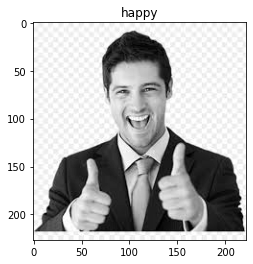

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  uploaded_image_path = f'/content/{fn}'

original_image = cv.imread(uploaded_image_path, cv.IMREAD_GRAYSCALE)
gray_image = original_image / 255
gray_image = cv.resize(gray_image, (267, 189))
gray_image = gray_image.reshape(-1, 267, 189, 1)

predictions = model.predict(gray_image)

plt.imshow(original_image, cmap='gray')
plt.title(class_names[np.argmax(predictions)])